# Changing Cuts

---

Aditya Marathe

In [1]:
%matplotlib inline

import os
import sys

import dotenv

import pathlib

import h5py

import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Local imports
sys.path.insert(1, './../')

from initial_analysis import *
from utils import *
from cuts import Cuts

In [2]:
# The '.env' file contains the directory to the data.
dotenv.load_dotenv();

In [3]:
file_dir = pathlib.Path(os.environ[LocalDatasets.REALLY_MINI])

df = load_nova_sample(file_dir)

In [4]:
numu_cuts = Cuts.init_nova_cuts()

In [6]:
# Redefine the PID cuts
def numu_2020_pid_cut(
        df: pd.DataFrame, 
        remid_threshold: float = 0.3,
        numuid_threshold: float = 0.8
    ) -> pd.Series:
    a = df['rec.sel.remid.pid'] > remid_threshold
    b = df['rec.sel.cvnloosepreselptp.numuid'] > numuid_threshold
    return a & b

In [7]:
def plot(
        axs: list[plt.Axes], 
        axs_index: int, 
        df: pd.DataFrame, 
        new_numuid_threshold: float = 0.3, 
        new_remid_threshold: float = 0.8
    ) -> None:
    bins_conf = np.linspace(0, 5, 50 + 1)
    
    plot_info = draw_plot_info(axs[axs_index])

    numu_cuts.define_cut(
        name='CVN PID Score', 
        cut_func=lambda df: numu_2020_pid_cut(
            df=df,
            remid_threshold=new_remid_threshold,
            numuid_threshold=new_numuid_threshold
        )
    )
    df_numu_cuts = numu_cuts.apply_all_cuts(df=df)

    *_, bc = axs[axs_index].hist(
        df_numu_cuts['rec.energy.numu.lstmnu'], 
        bins=bins_conf, 
        label='Passed Cuts',
        alpha=0.6
    )
    plot_info(df_numu_cuts['rec.energy.numu.lstmnu'], bc, 'Passed Cuts')

    *_, bc = axs[axs_index].hist(
        df_numu_cuts['rec.energy.numu.lstmnu'][~df_numu_cuts['isNuMuCC']], 
        bins=bins_conf,
        label='Background',
        alpha=0.6
    )
    plot_info(df_numu_cuts['rec.energy.numu.lstmnu'][~df_numu_cuts['isNuMuCC']], bc, 'Background')

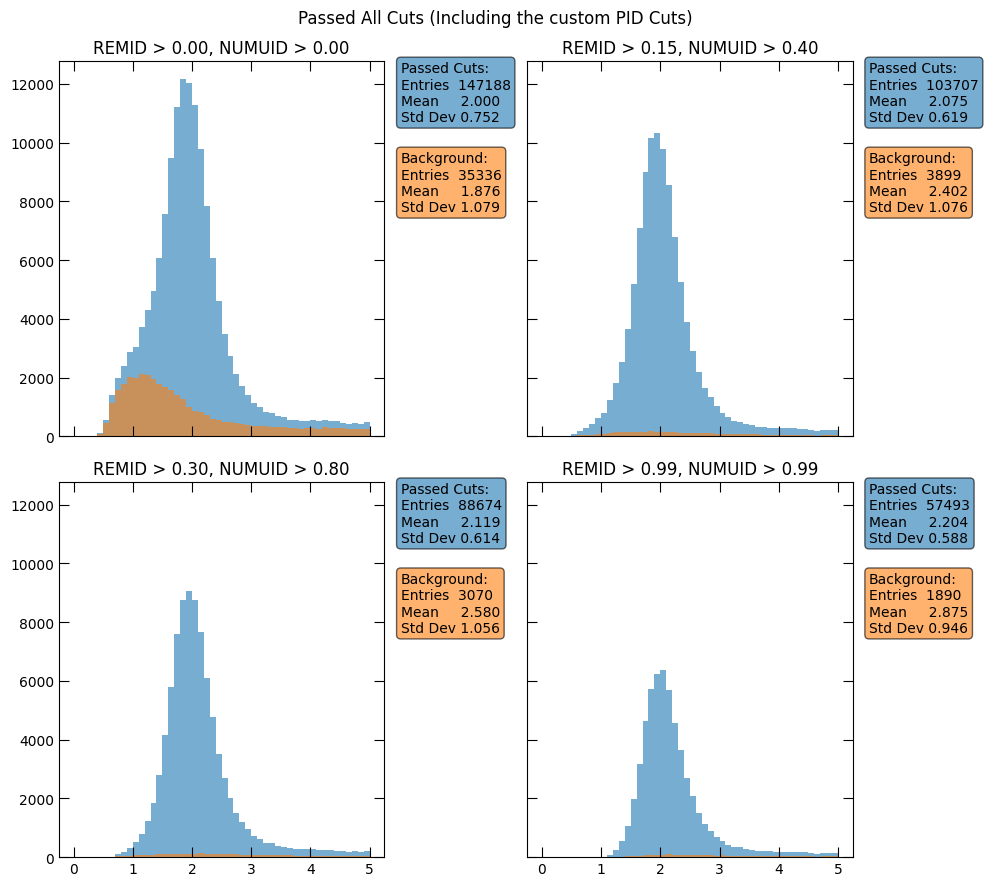

In [8]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 9))

axs = axs.flatten()

plot(
    axs=axs,
    axs_index=0,
    df=df,
    new_remid_threshold=0,
    new_numuid_threshold=0
)
axs[0].set_title('REMID > 0.00, NUMUID > 0.00')

#

plot(
    axs=axs,
    axs_index=1,
    df=df,
    new_remid_threshold=0.15,
    new_numuid_threshold=0.4
)
axs[1].set_title('REMID > 0.15, NUMUID > 0.40')

# 

plot(
    axs=axs,
    axs_index=2,
    df=df
)
axs[2].set_title('REMID > 0.30, NUMUID > 0.80')

#

plot(
    axs=axs,
    axs_index=3,
    df=df,
    new_remid_threshold=0.99,
    new_numuid_threshold=0.99
)
axs[3].set_title('REMID > 0.99, NUMUID > 0.99')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True, size=7)

fig.suptitle('Passed All Cuts (Including the custom PID Cuts)')

plt.tight_layout();

In [9]:
id_values = np.linspace(0, 1., 15)

result = np.zeros((id_values.shape[0], id_values.shape[0]))

# Not the most efficient way to do this, but it works
for i, numuid in enumerate(id_values):
    for j, remid in enumerate(id_values):
        numu_cuts.define_cut(
            name='CVN PID Score', 
            cut_func=lambda df: numu_2020_pid_cut(
                df=df,
                remid_threshold=remid,
                numuid_threshold=numuid
            )
        )
        df_numu_cuts = numu_cuts.apply_all_cuts(df=df)

        # Number of signal events
        sig = len(df_numu_cuts['rec.energy.numu.lstmnu'][df_numu_cuts['isNuMuCC']])
        # Total number of events
        total = len(df_numu_cuts['rec.energy.numu.lstmnu'])

        try:
            result[j, i] = sig / total * 100.
        except ZeroDivisionError:
            result[j, i] = 0.

$$
    \text{Efficiency} = \frac{\text{Signal Events Post-Cuts}}{\text{Total Signal Events}}
$$


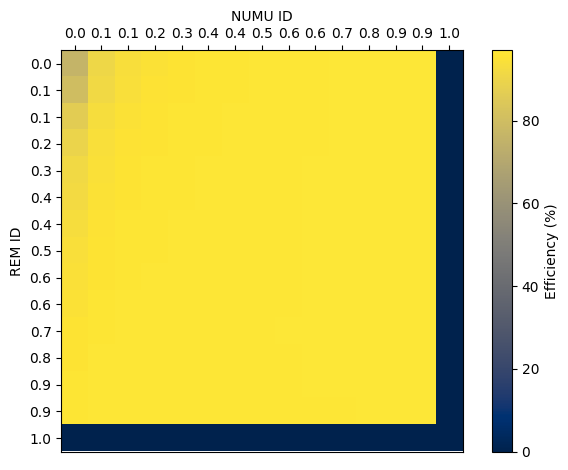

In [10]:
fig, ax = plt.subplots()

imshow = ax.imshow(result, cmap='cividis')

plt.colorbar(imshow, ax=ax, label=r'Efficiency (%)')

ax.set_xticks(range(result.shape[0]), np.round(id_values, 1))
ax.set_yticks(range(result.shape[1]), np.round(id_values, 1))

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.set_xlabel('NUMU ID')
ax.set_ylabel('REM ID')

plt.tight_layout();

In [12]:
print(f'Max(Efficiency) = {np.max(result):0.2f}%')

Max(Efficiency) = 97.01%


In [13]:
id_values = np.linspace(0, 0.99, 15)

result = np.zeros((id_values.shape[0], id_values.shape[0]))

# Not the most efficient way to do this, but it works
for i, numuid in enumerate(id_values):
    for j, remid in enumerate(id_values):
        numu_cuts.define_cut(
            name='CVN PID Score', 
            cut_func=lambda df: numu_2020_pid_cut(
                df=df,
                remid_threshold=remid,
                numuid_threshold=numuid
            )
        )
        df_numu_cuts = numu_cuts.apply_all_cuts(df=df)

        # Number of signal events
        sig = len(df_numu_cuts['rec.energy.numu.lstmnu'][df_numu_cuts['isNuMuCC']])
        # Total number of events
        total = len(df_numu_cuts['rec.energy.numu.lstmnu'])

        try:
            result[j, i] = sig / total * 100.
        except ZeroDivisionError:
            result[j, i] = 0.

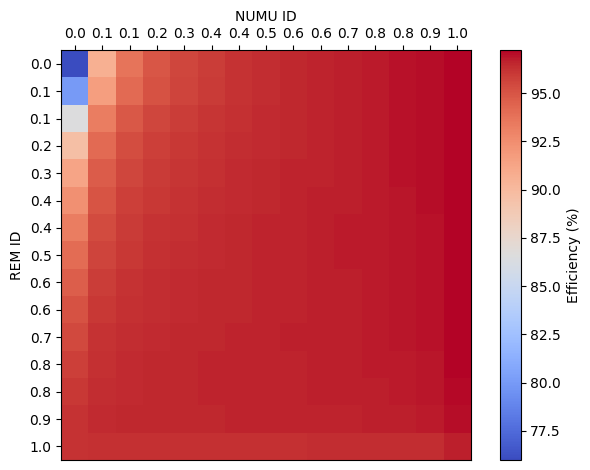

In [16]:
fig, ax = plt.subplots()

imshow = ax.imshow(result, cmap='coolwarm')

plt.colorbar(imshow, ax=ax, label=r'Efficiency (%)')

ax.set_xticks(range(result.shape[0]), np.round(id_values, 1))
ax.set_yticks(range(result.shape[1]), np.round(id_values, 1))

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

ax.set_xlabel('NUMU ID')
ax.set_ylabel('REM ID')

plt.tight_layout();